# Mapping elevation data to a Voronoi mesh

Now we want to map elevation data to the mesh, we created in the last example. To do this, we first need some elevation data. For demonstration purpose, we use some example data from pyvista.

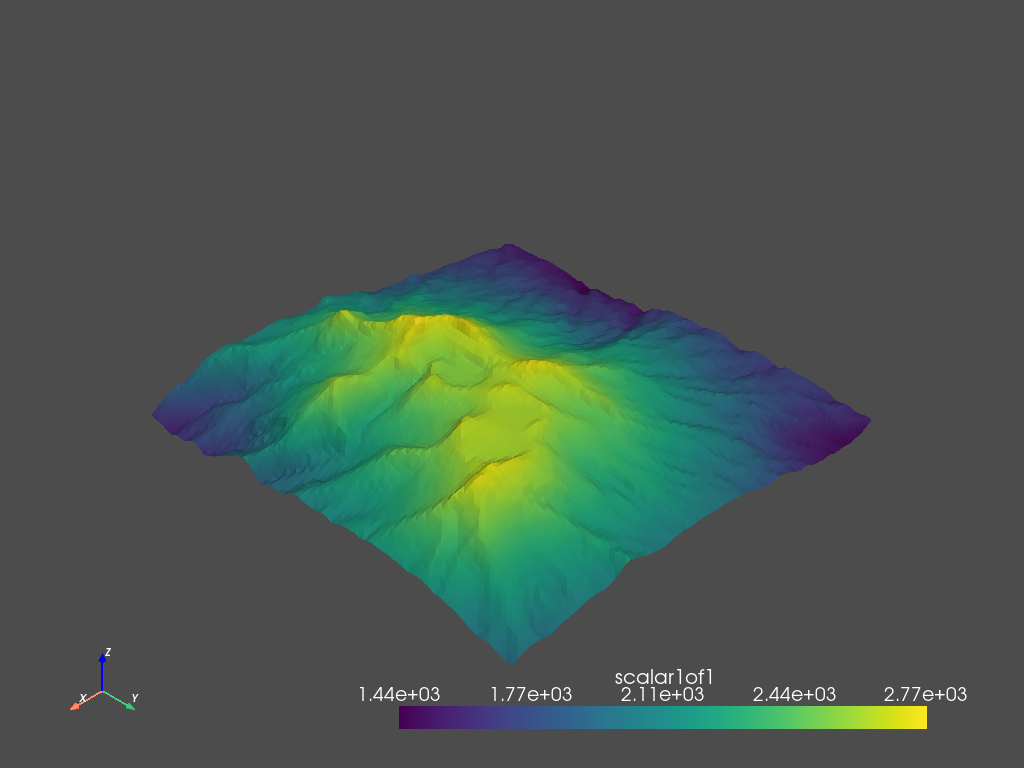

[1820500.0, 5649000.0, 2105.2999877929688]

In [2]:
import pyvista as pv
from pyvista import examples

dem = examples.download_crater_topo()
surf = dem.extract_subset((500, 900, 400, 800, 0, 0), (5, 5, 1))
surf = surf.warp_by_scalar()

pv.set_jupyter_backend('static')
surf.plot(notebook=True, show_edges=False)

surf_center = surf.center
surf_center

We read the mesh from the last example. Because the centers of the example data and the mesh did not match, we shift the center of the mesh to the center of the example data.

Then we use `update_z_from_surf()` to map the elevation data from the example data to the mesh.

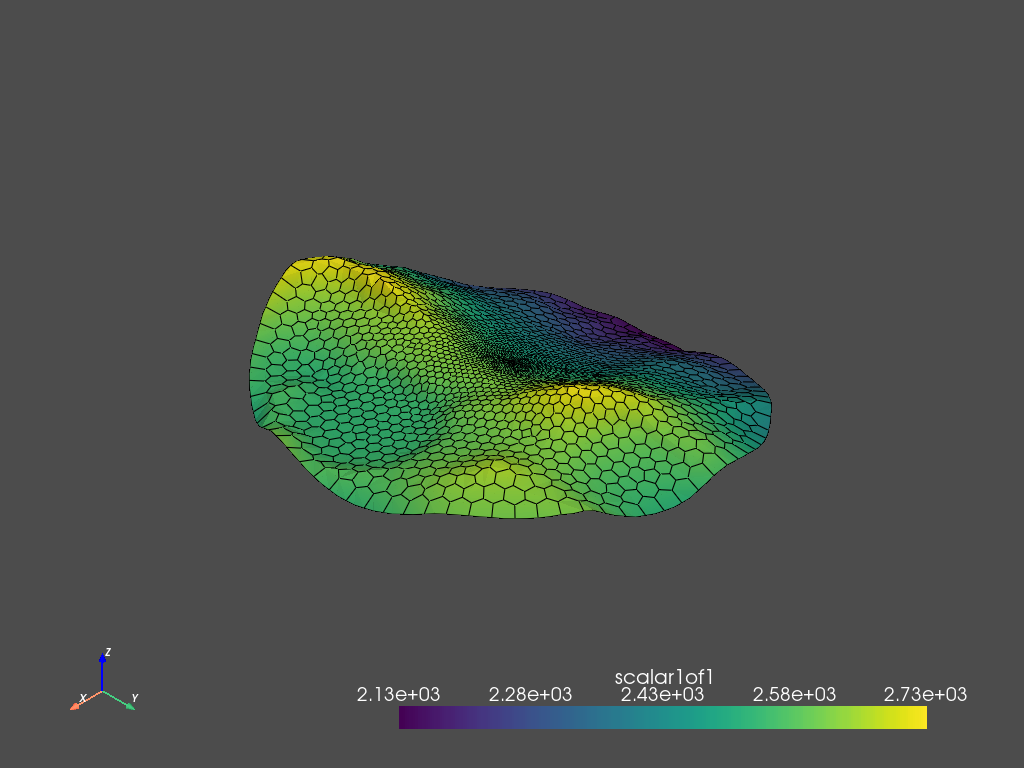

In [3]:
mesh = pv.read("./mesh/circle.vtu")

mesh.points

mesh.points[:, 0] = mesh.points[:, 0] + surf_center[0]
mesh.points[:, 1] = mesh.points[:, 1] + surf_center[1]

from voromesh import geo
surfmesh = geo.update_z_from_surf(mesh, surf)
surfmesh.plot(notebook=True, show_edges=True)


Now we can add some layers to get a volume mesh.

Remark: For ploting VTK divides prisms with more than six sides (Heptagonal prisms, octagonal prisms, ...) into tetrahedrons.

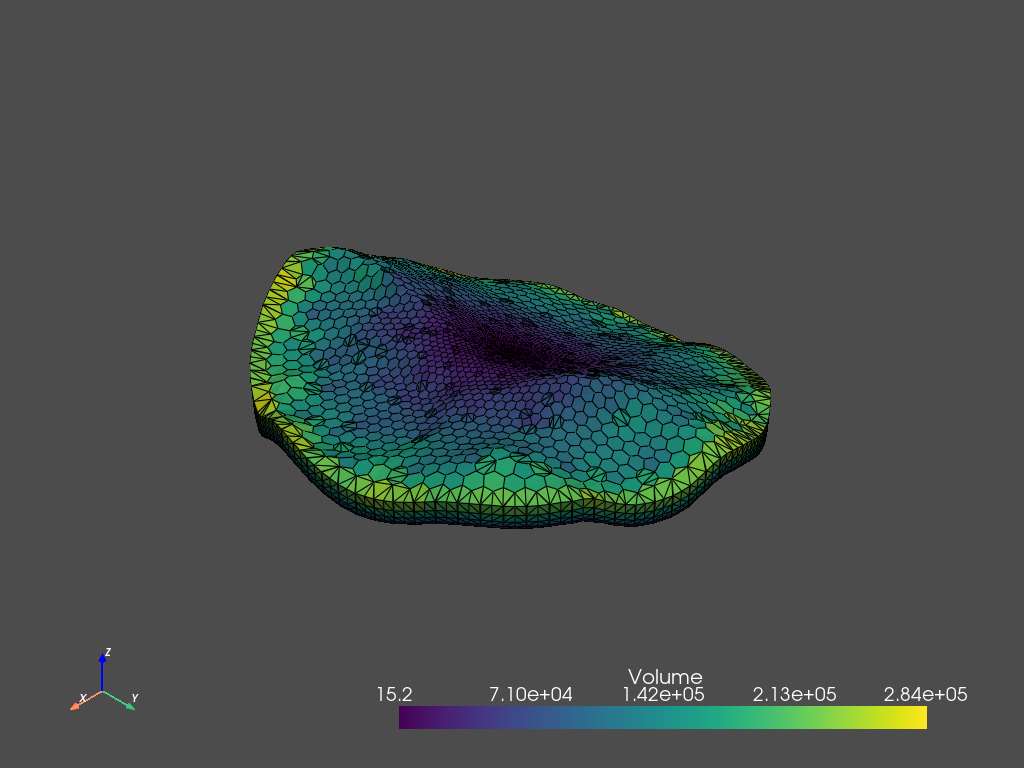

In [4]:
thickness = [10, 20, 30, 40]

volmesh = geo.layersfromsurf(surfmesh, thickness)
volmesh.plot(notebook=True, show_edges=True)

# volmesh.save("./mesh/volmesh.vtu")